<a href="https://colab.research.google.com/github/ELiTE0005/DeepLearningTechniques/blob/main/exp2_implement_a_classifier_using_open_source_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9211
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      0.92      0.89        13
   virginica       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

Confusion matrix:
 [[12  0  0]
 [ 0 12  1]
 [ 0  2 11]]

Feature importances:
              feature  importance
0  petal length (cm)    0.432769
1   petal width (cm)    0.428158
2  sepal length (cm)    0.115048
3   sepal width (cm)    0.024025


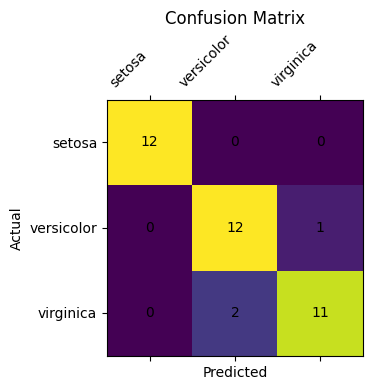

Model saved as classifier_iris.pkl


In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import joblib

data = load_iris(as_frame=True)
X = data.frame[data.feature_names]
y = data.frame['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=data.target_names)
cm = confusion_matrix(y_test, y_pred)

rf = pipeline.named_steps['rf']
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "feature": data.feature_names,
    "importance": importances
}).sort_values("importance", ascending=False).reset_index(drop=True)

print(f"Accuracy: {acc:.4f}")
print(report)
print("Confusion matrix:\n", cm)
print("\nFeature importances:\n", feat_imp)

fig, ax = plt.subplots(figsize=(5,4))
ax.matshow(cm)
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, int(val), ha='center', va='center')
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticks(range(len(data.target_names)))
ax.set_yticks(range(len(data.target_names)))
ax.set_xticklabels(data.target_names, rotation=45, ha='right')
ax.set_yticklabels(data.target_names)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()

joblib.dump(pipeline, "classifier_iris.pkl")
print("Model saved as classifier_iris.pkl")
